In [8]:
import numpy as np
import matplotlib.pyplot as plt



One simple and practical example of Dirichlet boundary conditions and Laplace equations is the problem of finding the steady-state temperature distribution in a metal plate with prescribed boundary temperatures.

Consider a metal plate of length L and width W, with insulated edges and a prescribed temperature distribution on the boundary. The temperature distribution in the plate is governed by the Laplace equation: ∂²T/∂x² + ∂²T/∂y² = 0

where T(x,y) is the temperature at point (x,y) in the plate. The boundary conditions are given by the temperatures at the four edges of the plate:

T(x,0) = T₁, T(x,W) = T₂, T(0,y) = T₃, T(L,y) = T₄

where T₁, T₂, T₃, and T₄ are the prescribed temperatures at the respective edges.

To solve this problem using the finite difference method, we can discretize the plate into a grid of points, with the boundary points fixed at the prescribed temperatures and the interior points subject to the Laplace equation. We can then use the finite difference approximation of the Laplace equation to obtain a system of linear equations that can be solved to find the temperature at each interior point.

To enforce the Dirichlet boundary conditions, we simply fix the temperature at the boundary points and exclude them from the system of equations. This ensures that the solution satisfies the prescribed temperatures at the boundary.

Once the system of equations is solved, we can obtain the temperature distribution in the plate by interpolating the solution at the grid points. The resulting temperature distribution provides a steady-state solution to the heat conduction problem in the plate, subject to the prescribed boundary temperatures.

In [110]:
# Define the dimensions of the plate and the grid spacing
plate_length = 1.0    # length of the plate, m
plate_width = 1.0    # width of the plate, m
num_points = 11    # number of grid points in each direction
dx = plate_length / (num_points-1)    # grid spacing in the x-direction
dy = plate_width / (num_points-1)    # grid spacing in the y-direction

dx, dy


(0.1, 0.1)

In [111]:
# Define the boundary temperatures
temp_top = 100.0    # temperature at y=0
temp_bottom = 0.0      # temperature at y=W
temp_left = 75.0     # temperature at x=0
temp_right = 50.0     # temperature at x=L



In [112]:
# Initialize the temperature array
T = np.zeros((num_points, num_points))

T #empty array which describes the plate - how hot it is in each segment

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [113]:
# Apply the boundary conditions
T[0, :] = temp_top    # temperature at y=0
T[-1, :] = temp_bottom   # temperature at y=W
T[:, 0] = temp_left    # temperature at x=0
T[:, -1] = temp_right   # temperature at x=L

T # dboundary conditions are set and now we know how hot each side of the plate is.

array([[ 75., 100., 100., 100., 100., 100., 100., 100., 100., 100.,  50.],
       [ 75.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  50.],
       [ 75.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  50.],
       [ 75.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  50.],
       [ 75.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  50.],
       [ 75.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  50.],
       [ 75.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  50.],
       [ 75.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  50.],
       [ 75.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  50.],
       [ 75.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  50.],
       [ 75.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  50.]])

Finite difference coefficients are found by approximating the partial derivatives of a function using finite differences. The basic idea is to replace the derivative of a function at a point with a finite difference formula that involves the function values at neighboring points.

For example, the second-order central difference formula for the second derivative of a function f(x) is:

f''(x) ≈ (f(x+h) - 2f(x) + f(x-h)) / h^2

where h is the grid spacing. This formula can be used to approximate the second derivative of f(x) at any point x where f(x+h), f(x), and f(x-h) are known.

In the case of the heat equation, the finite difference coefficients are derived from the discretized form of the equation. The discretized equation relates the values of the temperature at each grid point to the values of the temperature at neighboring grid points. The coefficients in the discretized equation depend on the grid spacing and the material properties of the system being modeled. By applying the boundary conditions and solving the discretized equation, we can obtain the temperature distribution over the entire domain.

### About coefficients:

These equations define the finite difference coefficients for the two-dimensional heat equation using the central difference method.

The central difference method is a numerical approximation method that is used to estimate the value of the derivative of a function at a given point using the function values at neighboring points. In the context of the heat equation, it is used to estimate the second derivative of temperature with respect to space in the x and y directions.



In this specific case, the finite difference coefficients are defined as follows:

```coeff_a = 1.0 / dx**2```: This represents the coefficient for the second derivative in the x direction, which is approximated using the values of temperature at points to the left and right of the current point.

```coeff_b = 1.0 / dy**2```: This represents the coefficient for the second derivative in the y direction, which is approximated using the values of temperature at points above and below the current point.

```coeff_c = -2.0 * (coeff_a + coeff_b)```: This represents the coefficient for the current point, which is a combination of the coefficients for the second derivatives in the x and y directions. The negative sign is due to the fact that the heat equation is a diffusion equation, meaning that heat flows from higher to lower temperatures, which corresponds to the negative direction of the temperature gradient.

The finite difference method approximates the second derivative of a function using the difference between its values at neighboring points. In the case of the two-dimensional heat equation, this involves taking the second derivative with respect to both the x and y directions.

To approximate the second derivative with respect to x, we use the central difference formula:

```d2/dx2(f(x)) = [f(x+dx) - 2f(x) + f(x-dx)] / dx^2```

Similarly, to approximate the second derivative with respect to y, we use:

```d2/dy2(f(y)) = [f(y+dy) - 2f(y) + f(y-dy)] / dy^2```

If we let dx = dy, we can simplify the coefficients for both directions to:

```coeff_a = 1 / dx^2```
```coeff_b = 1 / dx^2```
```coeff_c = -2 * (coeff_a + coeff_b)```

So the power of 2 in ```coeff_a = 1.0 / dx**2``` is because we are approximating the second derivative with respect to x using the central difference formula, which involves dividing by dx^2.

In this particular example, we have defined the grid spacing in the x and y directions to be the same, i.e., ```dx = dy```. This is because we are assuming that the plate has square dimensions, so the grid spacing in the x and y directions should be equal. However, in general, the grid spacing in the x and y directions may be different, depending on the problem being solved.


The value of -2.0 in coeff_c is determined by the central difference approximation, where the second derivative with respect to x or y is approximated as a linear combination of function values at the grid point (i,j) and its neighbors. The specific coefficient values used in this linear combination are determined by the choice of finite difference scheme.

In general, for a second-order accurate scheme, the coefficient of the central grid point should be negative and equal to the sum of the coefficients for the neighboring grid points. 

In [114]:
# Define the finite difference coefficients
coeff_a = 1.0 / dx**2
coeff_b = 1.0 / dy**2
coeff_c = -2.0 * (coeff_a + coeff_b)



In [115]:
coeff_a

99.99999999999999

In [116]:
# Define the system of equations
A = np.zeros((num_points*num_points, num_points*num_points))
b = np.zeros(num_points*num_points)



In [117]:
A.shape      # matrix

(121, 121)

In [118]:
b        #vector

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [119]:
for i in range(num_points):
    for j in range(num_points):
        k = i*num_points + j   # index of the current grid point
        if i == 0 or i == num_points-1 or j == 0 or j == num_points-1: #boundary condition
            A[k,k] = 1.0
            b[k] = T[i,j]
            #print(A[0])
        else:
            A[k,k-num_points] = coeff_a
            A[k,k-1] = coeff_b
            A[k,k] = coeff_c
            A[k,k+1] = coeff_b
            A[k,k+num_points] = coeff_a
            #print(A)



When you check each A element, you find an array there where all values are zero but one, which is the actual value. Basically, previous step prepares the matrix for step by step calculations.

In [145]:
A[29]

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        100.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,  100., -400.,  100.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,  100.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.])

In [121]:
b

array([ 75., 100., 100., 100., 100., 100., 100., 100., 100., 100.,  50.,
        75.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  50.,
        75.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  50.,
        75.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  50.,
        75.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  50.,
        75.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  50.,
        75.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  50.,
        75.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  50.,
        75.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  50.,
        75.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  50.,
        75.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  50.])

```np.linalg.solve(A, b)``` is a NumPy function that solves a linear equation ```Ax = b``` for x, where A is a square matrix and b is a vector. It uses the LU decomposition method to solve the equation. 

A is a matrix representing the system of linear equations, and b is a vector containing the boundary conditions. The solution T_flat obtained by ```np.linalg.solve(A, b)``` is a vector representing the temperature at each grid point of the plate. This vector is reshaped into a 2D array T using ```T_flat.reshape((N,N))```, where N is the number of grid points in each direction. 

In [122]:
# Solve the system of equations
T_flat = np.linalg.solve(A, b)          # vector = matrix x vector

# Reshape the solution to a 2D array
T = T_flat.reshape((num_points, num_points))



In [123]:
T[0]

array([ 75., 100., 100., 100., 100., 100., 100., 100., 100., 100.,  50.])

In [124]:
X, Y = np.meshgrid(np.linspace(0, plate_length, num_points), np.linspace(0, plate_width, num_points))

In [125]:
T

array([[ 75.        , 100.        , 100.        , 100.        ,
        100.        , 100.        , 100.        , 100.        ,
        100.        , 100.        ,  50.        ],
       [ 75.        ,  86.11562621,  89.71258986,  90.75020161,
         90.76989573,  90.24283792,  89.18627108,  87.22995656,
         83.27251282,  74.16937572,  50.        ],
       [ 75.        ,  79.74991496,  81.98453164,  82.51832084,
         82.08654339,  81.01518486,  79.27228984,  76.46104236,
         71.69071898,  63.40499008,  50.        ],
       [ 75.        ,  75.89950199,  75.9573009 ,  75.25200673,
         74.04277212,  72.45906828,  70.42666105,  67.65120404,
         63.62433069,  57.75986559,  50.        ],
       [ 75.        ,  72.89079208,  70.69316324,  68.48963306,
         66.37347009,  64.35165511,  62.32408205,  60.09278206,
         57.39553414,  54.01014161,  50.        ],
       [ 75.        ,  69.97050312,  65.4349269 ,  61.6398922 ,
         58.60982006,  56.25      ,  54.4

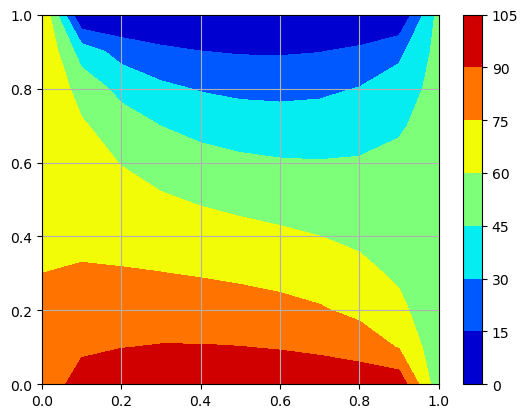

In [126]:
# Plot the solution

plt.contourf(X, Y, T, cmap='jet')
plt.grid()
plt.colorbar()
plt.show()


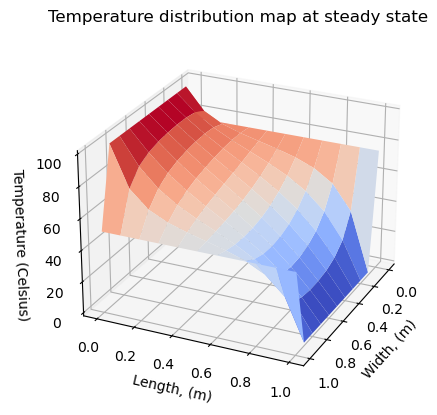

In [127]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, T, cmap='coolwarm')
ax.set_xlabel('Width, (m)')
ax.set_ylabel('Length, (m)')
ax.set_zlabel('Temperature (Celsius)')
plt.title("Temperature distribution map at steady state")
ax.view_init(elev=25, azim=25)
plt.show()